# Importing data


In [1]:
import pandas as pd
import numpy as np

df_train=pd.read_csv("train.csv")
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
df_test=pd.read_csv("test.csv")

In [3]:
X_train= df_train.drop(["label"],axis=1)
y_train= df_train["label"]

In [4]:
df_train.label.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

## PREPROCESSING

In [5]:
X_train = X_train / 255.0
df_test = df_test / 255.0
print("x_train shape: ",X_train.shape)
print("test shape: ",df_test.shape)

x_train shape:  (42000, 784)
test shape:  (28000, 784)


In [6]:
X_train = X_train.values.reshape(-1,28,28,1)
df_test = df_test.values.reshape(-1,28,28,1)

In [7]:
from keras.utils.np_utils import to_categorical 
Y_train = to_categorical(y_train, num_classes = 10)

# MODEL BUILDING

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size = 0.2)

In [9]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator

model = Sequential()

model.add(Conv2D(8,activation ='relu',kernel_size = (5,5), input_shape = (28,28,1),padding="same"))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))

model.add(Conv2D(16,kernel_size = (4,4),activation ='relu',padding="same"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.20))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [10]:
model.compile(optimizer = Adam(lr=0.001,beta_1=0.9,beta_2=0.999) , loss = "categorical_crossentropy", metrics=["accuracy"])

# IMAGE DATA GENERATOR

In [11]:
datagen = ImageDataGenerator(        
        featurewise_center=False,  
        samplewise_center=False, 
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False, 
        rotation_range=5,  
        zoom_range = 0.1, 
        width_shift_range=0.1,  
        height_shift_range=0.1,  
        horizontal_flip=False,  
        vertical_flip=False)  

datagen.fit(X_train)

train_set=datagen.flow(X_train,Y_train)

In [12]:
history = model.fit_generator(train_set,
                              epochs = 70,
                              validation_data = (X_test,Y_test), 
                              steps_per_epoch=X_train.shape[0] // 250
                              )

C:\Users\91990\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/70
134/134 [==============================] - 6s 40ms/step - loss: 1.8871 - accuracy: 0.3392 - val_loss: 0.4304 - val_accuracy: 0.8914
Epoch 2/70
134/134 [==============================] - 4s 33ms/step - loss: 0.8145 - accuracy: 0.7365 - val_loss: 0.2118 - val_accuracy: 0.9467
Epoch 3/70
134/134 [==============================] - 5s 35ms/step - loss: 0.5404 - accuracy: 0.8263 - val_loss: 0.1507 - val_accuracy: 0.9580
Epoch 4/70
134/134 [==============================] - 5s 35ms/step - loss: 0.4334 - accuracy: 0.8654 - val_loss: 0.1383 - val_accuracy: 0.9590
Epoch 5/70
134/134 [==============================] - 5s 38ms/step - loss: 0.4142 - accuracy: 0.8663 - val_loss: 0.1219 - val_accuracy: 0.9658
Epoch 6/70
134/134 [==============================] - 5s 37ms/step - loss: 0.3255 - accuracy: 0.8936 - val_loss: 0.1122 - val_accuracy: 0.9677
Epoch 7/70
134/134 [==============================] - 5s 40ms/step - loss: 0.3076 - accuracy: 0.9045 - val_loss: 0.1061 - val_accuracy: 0.9680

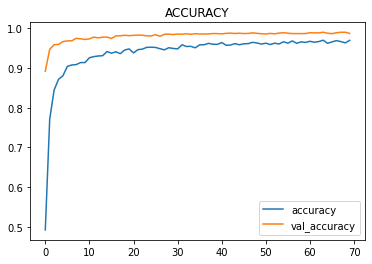

In [13]:
import matplotlib.pyplot as plt

acc=history.history["accuracy"]
val_acc=history.history["val_accuracy"]
epochs=range(len(acc))

plt.plot(epochs,acc,label="accuracy")
plt.plot(epochs,val_acc,label="val_accuracy")
plt.title("ACCURACY")
plt.legend();

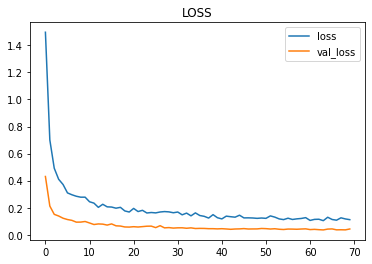

In [14]:
loss=history.history["loss"]
val_loss=history.history["val_loss"]
epochs=range(len(acc))

plt.plot(epochs,loss,label="loss")
plt.plot(epochs,val_loss,label="val_loss")
plt.title("LOSS")
plt.legend();

In [20]:
df_test1=pd.read_csv("test.csv")
df_test1.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
df_test1.isna().sum()

pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 784, dtype: int64

In [23]:
df_test1 = df_test1 / 255.0

In [28]:
df_test1 = df_test1.values.reshape(-1,28,28,1)

In [30]:
y_lol=model.predict(df_test1)

In [36]:
ans={}
a=0
for i in y_lol:
    ans[a]=np.argmax(i)
    a=a+1

In [47]:
df2 = pd.DataFrame(list(ans.items()),columns = ['ImageID','Label']) 

In [57]:
df2["ImageID"]=df2["ImageID"]+1

In [59]:
df2.to_csv("Submit3.csv",index=False)

In [65]:
model.save("digit_model.h5")